## Ejercicio práctivo de visualización: Mapas con Geopandas

Geopandas: https://geopandas.org/en/stable/

Es un paquete de visualización de datos geoespaciales, que combina Pandas y Matplotlib. GeoPandas nos da acceso a una serie de funcionalidades muy útiles para realizar mapas, análisis de datos geoespaciales y cartográficas de datos geográficos.

Instalamos paquetes necesarios:

In [1]:
!pip install geopandas 
!apt install gdal-bin python-gdal python3-gdal #install geopython libraries
!apt install python3-rtree #install python3-rtree - Geopandas requirement
#!pip install git+git://github.com/geopandas/geopandas.git #install geopandas
!pip install descartes #install descartes - Geopandas requirement

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-whee

Importamos todos los paquetes que vamos a necesitar:

In [2]:
#import packages:
import pandas as pd # Pandas for Data manipulation and analysis
import numpy as np # NumPy for Advanced linear algebra
import geopandas as gpd # Geopandas for programming geospatial data in python
from shapely.geometry import Point # Figuras geométricas 
import matplotlib # Matplotlib for Visualization and data plotting
import matplotlib.pyplot as plt # matplotlib.pyplot for plotting map

Leemos el dataframe naturalearth_lowres, uno de los datasets que tiene Geopandas que contiene los datos geometricos necesarios para graficar los paises del mundo. Nos crea el dataframe que hemos llamado world

In [3]:
# Read the world data and show the header
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # tierra natural de baja resolución
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Leemos el dataframe naturalearth_cities que tiene los puntos (coordenadas) que corresponden a las capitales de cada país:

In [4]:
#Read the capitals data and show the header
capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
capitals.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


Filtramos la información...
Nos quedamos en el dataframe con aquellos paises cuya población (pop_est)sea mayor a 0, y con aquellos cuyo nombre sea diferente a Antarctica

In [5]:
#plot a Map of GDP per capita without using pyplot
world = world[(world.pop_est>0) & (world.name!="Antarctica")] # exclude negative population and Antarctica

Creamos una nueva columna en nuestro dataframe, y le asignamos el GDP que es el PBI (Producto Interno Bruto) per capita de cada país, y se calcula dividendo los ingresos del país (gdp_md_est) entre la población o num total de habitantes (pop_est)

In [6]:
# GDP (PIB Producto Interior Bruto) = Ingresos / población 
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.head()

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.009093
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.002791
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.001503
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.046991
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.056823


Creamos el primer gráfico del mundo teniendo en cuenta PBI per capita (la columna que creamos)

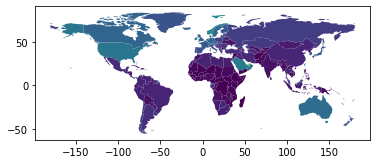

In [7]:
world.plot(column='gdp_per_cap')

Creamos el mismo grafico, pero ademas, mostrando las capitales de cada país

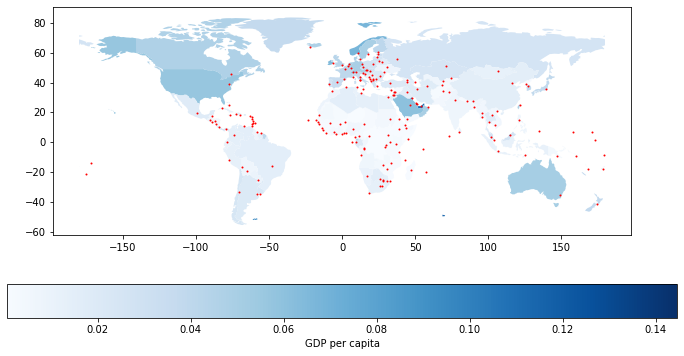

In [8]:
#Use pyplot (plt) to plot a world map with capital markers and shaded by gdp per capita with a scale bar
# Utilice pyplot (plt) para trazar un mapa del mundo con marcadores de capital y sombreado por el pib per cápita con una barra de escala
fig, ax = plt.subplots(figsize=(12,6))

world.plot(column='gdp_per_cap', cmap='Blues', ax=ax, legend=True, legend_kwds={'label': "GDP per capita", 'orientation': "horizontal"})

capitals.plot(markersize=1, color='red', ax=ax)

plt.show()

Creamos un último gráfico, buscando (con un filtro) del dataframe countries el país cuyo name es Argentina 

Y del dataframe capitals, la ciudad de Buenos Aires

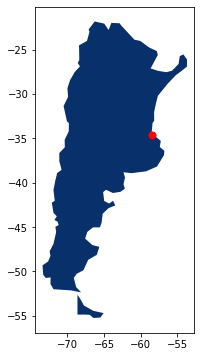

In [14]:
#Use pyplot (plt) to plot a country map such as Argentina
fig, ax_nz = plt.subplots(figsize=(8,6))

countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

countries[countries["name"] == "Argentina"].plot(cmap='Blues_r', ax=ax_nz)
capitals[capitals["name"] == "Buenos Aires"].plot(markersize=50, color='red', ax=ax_nz)

plt.show()